In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('E:\python practice\ISEP Sexist Data labeling.csv')
df.head()

,Sentences,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1


In [3]:
x=df['Sentences']
y=df['Label']

In [4]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    sentences = re.sub('[^-9A-Za-z]', ' ', df['Sentences'][i])
    sentences = sentences.lower()
    sentences = sentences.split()
    
    sentences  = [ps.stem(word) for word in sentences  if not word in stopwords.words('english')]
    sentences  = ' '.join(sentences)
    corpus.append(sentences)

[nltk_data] Downloading package stopwords to C:\Users\Amjad Net
[nltk_data]     Cafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
    
cv = CountVectorizer(max_features =5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()
y=df['Label']

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.40)

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=100)
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
lr.score(xtest,ytest)

0.8175824175824176

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

accu_scr_lr=accuracy_score(ytest,y_pred)
print(accu_scr_lr)

prec_scr_lr=precision_score(ytest,y_pred)
print(prec_scr_lr)

recall_scr_lr=recall_score(ytest,y_pred)
print(recall_scr_lr)

0.8175824175824176
0.8443579766536965
0.8346153846153846


# Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import MultinomialNB
nv=MultinomialNB(alpha=3.6)
#from sklearn.naive_bayes import GaussianNB
#model=GaussianNB()
#model.fit(xtrain_count,ytrain)
nv.fit(xtrain,ytrain)

MultinomialNB(alpha=3.6)

In [10]:
y_pred1=nv.predict(xtest)

In [11]:
accu_scr_nb=accuracy_score(ytest,y_pred1)
print(accu_scr_nb)

prec_scr_nb=precision_score(ytest,y_pred1)
print(prec_scr_nb)

recall_scr_nb=recall_score(ytest,y_pred1)
print(recall_scr_nb)

0.8021978021978022
0.7777777777777778
0.9153846153846154


# DecisionTree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
dt.fit(xtrain, ytrain)
dt.score(xtest,ytest)

0.8285714285714286

In [13]:
y_pred2=dt.predict(xtest)


In [14]:
accu_scr_dt=accuracy_score(ytest,y_pred2)
print(accu_scr_dt)

prec_scr_dt=precision_score(ytest,y_pred2)
print(prec_scr_dt)

recall_scr_dt=recall_score(ytest,y_pred2)
print(recall_scr_dt)

0.8285714285714286
0.8888888888888888
0.8


# Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(xtrain,ytrain)

y_pred3=rf.predict(xtest)
y_pred3
rf.score(xtest,ytest)


0.8175824175824176

In [16]:
#Accuracy
accu_scr_rf=accuracy_score(ytest,y_pred3)
print(accu_scr_rf)

prec_scr_rf=precision_score(ytest,y_pred3)
print(prec_scr_rf)

recall_scr_rf=recall_score(ytest,y_pred3)
print(recall_scr_rf)


0.8175824175824176
0.9004524886877828
0.7653846153846153


# K Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

y_pred4=knn.predict(xtest)
y_pred4
rf.score(xtest,ytest)

0.8175824175824176

In [18]:
#Accuracy
accu_scr_knn=accuracy_score(ytest,y_pred4)
print(accu_scr_knn)

prec_scr_knn=precision_score(ytest,y_pred4)
print(prec_scr_knn)

recall_scr_knn=recall_score(ytest,y_pred4)
print(recall_scr_knn)

0.5032967032967033
0.8695652173913043
0.15384615384615385


# SVM  Model

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
y_pred5=svm.predict(xtest)

svm.score(xtest,ytest)


0.8197802197802198

In [20]:
#Accuracy
accu_scr_svm=accuracy_score(ytest,y_pred5)
print(accu_scr_svm)

prec_scr_svm=precision_score(ytest,y_pred5)
print(prec_scr_svm)

recall_scr_svm=recall_score(ytest,y_pred5)
print(recall_scr_svm)

0.8197802197802198
0.8345864661654135
0.8538461538461538


# Grpah Of All Models

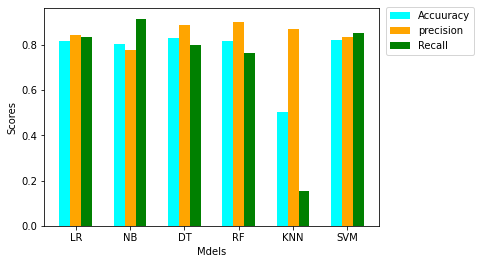

In [21]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
X = np.arange(6)
y1= [accu_scr_lr,accu_scr_nb,accu_scr_dt,accu_scr_rf,accu_scr_knn,accu_scr_svm]
    
y2=[prec_scr_lr,prec_scr_nb,prec_scr_dt,prec_scr_rf,prec_scr_knn,prec_scr_svm]

y3=[recall_scr_lr,recall_scr_nb,recall_scr_dt,recall_scr_rf,recall_scr_knn,recall_scr_svm]
width=0.2
  
# plot data in grouped manner of bar type
plt.bar(X-0.2, y1, width, color='cyan')
plt.bar(X, y2, width, color='orange')
plt.bar(X+0.2, y3, width, color='green')
plt.xticks(X, ["LR","NB","DT","RF","KNN","SVM"])
plt.xlabel("Mdels")
plt.ylabel("Scores")
plt.legend(["Accuuracy","precision","Recall"], bbox_to_anchor =(1.3,1.03),ncol=1)
plt.show()